# Mobile insights

## CSV

### 0. Import libraries

In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


### 1. Settings

In [2]:
# Time period 1st Jan - 30th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [3]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:sessionsWithEvent
#ga:bounceRate

#dimensions
#ga:deviceCategory

### 2. Data import & transformation

In [6]:
# Open file
input_mob= pd.read_csv('files/TMRW_mob.csv')

# rename columns
input_mob.columns=['Device','Sessions','Bounce Rate','Conversions','CR'] 

# group by device
input_mob = input_mob.set_index('Device')

input_mob

,Sessions,Bounce Rate,Conversions,CR
Device,,,,
desktop,4061,52.647131,114,0.028072
mobile,2261,62.627156,30,0.013268
tablet,270,55.555556,3,0.011111


### 3. Calculate

In [7]:
mobile_Sessions = input_mob.loc['mobile','Sessions']
desktop_CR = input_mob.loc['desktop','CR']
mobile_Conversions = input_mob.loc['mobile','Conversions']
mobile_CR = input_mob.loc['mobile','CR']

conv_increase =  "%.0f" % (mobile_Sessions * desktop_CR - mobile_Conversions)
conv_increase = int(conv_increase)

#mobileSessions
#desktopCR
#mobileConversions
mobile_CR

0.013268465

### 4. Validate

In [8]:
#if mobile CR is greater, equel or less by more than 20% result is failed

dif = mobile_CR / desktop_CR

if dif > 0.8:
    result = False
    
else:
    result = True
    
result

True

### 5. Visualise

Have 33 more conversions per month by optmising mobile UX


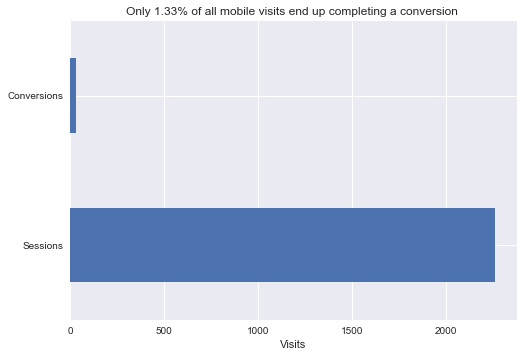

In [9]:
output_chart_mob = input_mob.loc['mobile',['Sessions','Conversions']]
output_chart_mob.plot.barh(stacked=True)

labels = output_chart_mob.index
sizes = output_chart_mob

# colours are taken from http://tools.medialab.sciences-po.fr/iwanthue/
colors = ['#b94663','#6fac5d', '#677ad1']
explode = (0, 0, 0)
plt.xlabel('Visits')
plt.title('Only %s ' % ("%.2f" % (mobile_CR*100) +'% of all mobile visits end up completing a conversion' ))

#need to specify analytics time perdiod
print ("Have %s more conversions per month by optmising mobile UX" % conv_increase)

plt.show()


## JSON

### 0. Import libraries

In [46]:
import json

with open('files/TMRW_mob.json') as file:
    input_dev = json.load(file)
    
input_dev

{'reports': [{'columnHeader': {'dimensions': ['ga:deviceCategory'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:sessions',
       'type': 'INTEGER'},
      {'name': 'ga:bounces', 'type': 'INTEGER'},
      {'name': 'ga:goal1Completions', 'type': 'INTEGER'}]}},
   'data': {'rows': [{'dimensions': ['desktop'],
      'metrics': [{'values': ['4263', '2251', '117']}]},
     {'dimensions': ['mobile'],
      'metrics': [{'values': ['2352', '1468', '26']}]},
     {'dimensions': ['tablet'],
      'metrics': [{'values': ['278', '155', '3']}]}]}}]}

In [78]:
# Define dimensions list
input_dev_dimensions = input_dev['reports'][0]['columnHeader']['dimensions']

input_dev_dimensions

['ga:deviceCategory']

In [79]:
# Define metrics list
input_dev_metrics = input_dev['reports'][0]['columnHeader']['metricHeader']['metricHeaderEntries']

def create_metric_list(raw_data):
    lst = []
    for item in raw_data:
        lst.append(item['name'])
    return lst

input_dev_metrics = create_list(input_dev_metrics)

input_dev_metrics

['ga:sessions', 'ga:bounces', 'ga:goal1Completions']

In [80]:
input_dev_data = input_dev['reports'][0]['data']['rows']

input_dev_data

[{'dimensions': ['desktop'], 'metrics': [{'values': ['4263', '2251', '117']}]},
 {'dimensions': ['mobile'], 'metrics': [{'values': ['2352', '1468', '26']}]},
 {'dimensions': ['tablet'], 'metrics': [{'values': ['278', '155', '3']}]}]

In [150]:
# Define Sessions dict

dev_sessions = {}
dev_bounces = {}
dev_conversions = {}


for device in input_dev_data:
    
    device_name = device['dimensions'][0]
        
    sessions_metric = int(device['metrics'][0]['values'][0])
    bounces_metric = int(device['metrics'][0]['values'][1])
    conv_metric = int(device['metrics'][0]['values'][2])
    
    dev_sessions[device_name] = sessions_metric
    dev_bounces[device_name] = bounces_metric
    dev_conversions[device_name] = conv_metric
    
print(dev_sessions)
print(dev_bounces)
print(dev_conversions)

new_data = [dev_sessions, dev_bounces, dev_conversions]
new_data

{'desktop': 4263, 'mobile': 2352, 'tablet': 278}
{'desktop': 2251, 'mobile': 1468, 'tablet': 155}
{'desktop': 117, 'mobile': 26, 'tablet': 3}


[{'desktop': 4263, 'mobile': 2352, 'tablet': 278},
 {'desktop': 2251, 'mobile': 1468, 'tablet': 155},
 {'desktop': 117, 'mobile': 26, 'tablet': 3}]

In [237]:
def create_dev_data(s,b,c):
    dev_data = {}
    metrics = {
        'sessions' : 0,
        'bounces' : 0,
        'conversions' : 0
        }
    for device in s:
        print(device)
        dev_data[device] = 0
        
        
        #print(dev_sessions[device])
        #print(device)
        #
        metrics['sessions'] = s[device]
        #print(device)
        #print(metrics)

        metrics['bounces'] = b[device]
        metrics['conversions'] = c[device]
        
        dev_data[device] = metrics
        print (dev_data)
        
    #print(metrics)
        
        
        
    return dev_data
    

create_dev_data(dev_sessions,dev_bounces,dev_conversions)

desktop
{'desktop': {'sessions': 4263, 'bounces': 2251, 'conversions': 117}}
mobile
{'desktop': {'sessions': 2352, 'bounces': 1468, 'conversions': 26}, 'mobile': {'sessions': 2352, 'bounces': 1468, 'conversions': 26}}
tablet
{'desktop': {'sessions': 278, 'bounces': 155, 'conversions': 3}, 'mobile': {'sessions': 278, 'bounces': 155, 'conversions': 3}, 'tablet': {'sessions': 278, 'bounces': 155, 'conversions': 3}}


{'desktop': {'bounces': 155, 'conversions': 3, 'sessions': 278},
 'mobile': {'bounces': 155, 'conversions': 3, 'sessions': 278},
 'tablet': {'bounces': 155, 'conversions': 3, 'sessions': 278}}

In [101]:
# Define Bounces dict

dev_bounces = {}
for device in input_dev_data:
    
    sessions_metric = (device['metrics'][0]['values'][0])
    dev_sessions[device['dimensions'][0]] = sessions_metric
    
dev_sessions

{'desktop': '4263', 'mobile': '2352', 'tablet': '278'}